<a href="https://colab.research.google.com/github/acavanag/AB/blob/master/Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [607]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [608]:
data = pd.read_csv('data3.csv')

In [609]:
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,NaN,Single Family Residential,29910 High Valley Rd,Farmington Hills,MI,48331,335000.0,4.0,2.5,NaN,1870.0,14810.0,1972.0,NaN,179.0,NaN,NaN,NaN,NaN,https://www.redfin.com/MI/Farmington-Hills/299...,NaN,NaN,N,Y,42.515828,-83.392230
1,PAST SALE,April-19-2021,Single Family Residential,28375 Ranchwood Dr,Southfield,MI,48076,220000.0,3.0,2.0,Southfield,1508.0,55321.0,1952.0,237.0,146.0,NaN,Sold,NaN,NaN,https://www.redfin.com/MI/Southfield/28375-Ran...,REALCOMP,2.210017e+09,N,Y,42.497307,-83.248782
2,PAST SALE,May-26-2021,Single Family Residential,19185 Eldridge Ln,Southfield,MI,48076,300000.0,4.0,2.5,Southfield,2158.0,24393.0,1968.0,200.0,139.0,3.0,Sold,NaN,NaN,https://www.redfin.com/MI/Southfield/19185-Eld...,REALCOMP,2.210008e+09,N,Y,42.514447,-83.234603
3,PAST SALE,April-1-2021,Single Family Residential,30420 Shoreham St,Southfield,MI,48076,284000.0,4.0,2.0,Southfield,1545.0,9147.0,1965.0,255.0,184.0,NaN,Sold,NaN,NaN,https://www.redfin.com/MI/Southfield/30420-Sho...,REALCOMP,2.210013e+09,N,Y,42.511748,-83.241254
4,PAST SALE,August-6-2021,Single Family Residential,28417 Fontana Dr,Southfield,MI,48076,265000.0,3.0,1.5,Southfield,1576.0,7840.0,1961.0,128.0,168.0,NaN,Sold,NaN,NaN,https://www.redfin.com/MI/Southfield/28417-Fon...,REALCOMP,2.210051e+09,N,Y,42.497005,-83.244307


In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4001 non-null   object 
 1   SOLD DATE                                                                                    3551 non-null   object 
 2   PROPERTY TYPE                                                                                4000 non-null   object 
 3   ADDRESS                                                                                      3999 non-null   object 
 4   CITY                                                                                         3999 non-null   object 
 5   STATE OR PROVINCE                 

In [611]:
data.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,MLS#,LATITUDE,LONGITUDE
count,3.992000e+03,3969.000000,3992.000000,3993.000000,3.920000e+03,3993.000000,3551.000000,3985.000000,1194.000000,0.0,0.0,3.551000e+03,4000.000000,4000.000000
mean,5.122809e+05,3.566893,2.648171,2389.813674,1.874853e+04,1967.328074,170.528020,205.314680,36.891960,NaN,NaN,2.183669e+09,42.558535,-83.262399
std,4.588096e+05,0.823436,1.202822,1236.151734,3.439154e+04,23.818179,100.587184,85.308773,82.644103,NaN,NaN,1.871258e+09,0.039831,0.080070
min,3.600000e+02,0.000000,1.000000,551.000000,2.178000e+03,1830.000000,2.000000,0.000000,1.000000,NaN,NaN,3.277795e+06,42.481595,-83.436049
25%,2.750000e+05,3.000000,2.000000,1492.000000,8.276000e+03,1953.000000,83.000000,152.000000,8.000000,NaN,NaN,2.210005e+09,42.527886,-83.330080
50%,3.800000e+05,4.000000,2.500000,2200.000000,1.350300e+04,1964.000000,165.000000,187.000000,18.000000,NaN,NaN,2.210031e+09,42.550861,-83.244390
75%,5.731250e+05,4.000000,3.500000,2940.000000,2.030950e+04,1983.000000,248.000000,241.000000,30.750000,NaN,NaN,2.210059e+09,42.592311,-83.200302
max,6.000000e+06,8.000000,10.500000,14900.000000,1.393048e+06,2022.000000,364.000000,983.000000,1033.000000,NaN,NaN,7.202110e+10,42.649770,-83.120352


In [612]:
data.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

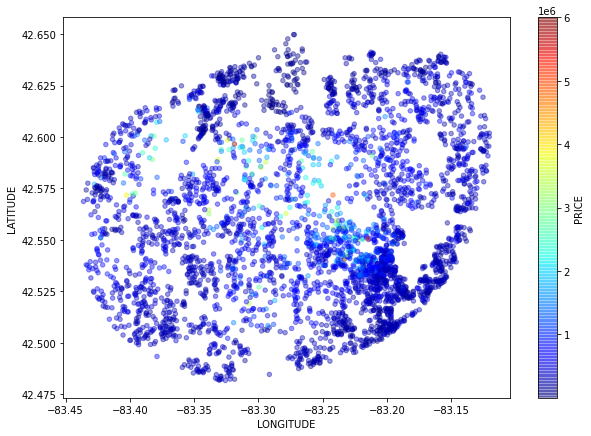

In [613]:
# data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2)

data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4, figsize=(10,7),
    c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [614]:
corr_matrix = data.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                         1.000000
SQUARE FEET                   0.782938
BATHS                         0.744962
$/SQUARE FEET                 0.685045
BEDS                          0.472493
YEAR BUILT                    0.388326
HOA/MONTH                     0.354546
LOT SIZE                      0.181572
LATITUDE                      0.010094
DAYS ON MARKET               -0.004141
MLS#                         -0.013646
LONGITUDE                    -0.035515
NEXT OPEN HOUSE START TIME         NaN
NEXT OPEN HOUSE END TIME           NaN
Name: PRICE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9467b2c790>,
      dtype=object)

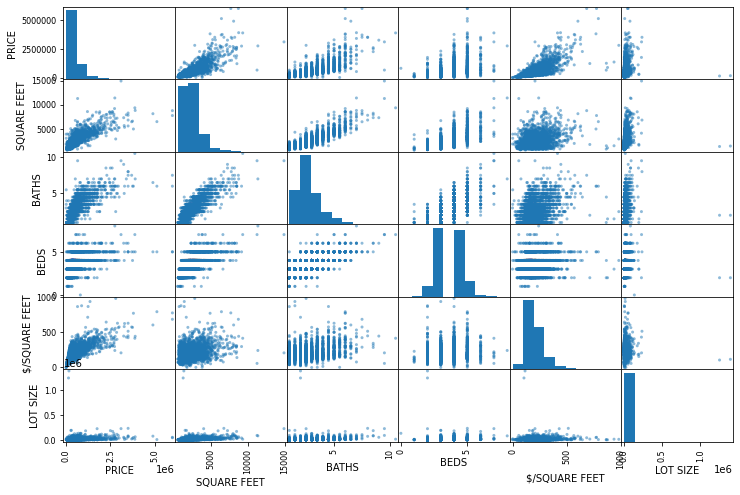

In [615]:
from pandas.plotting import scatter_matrix
attributes = ["PRICE", "SQUARE FEET", "BATHS", "BEDS", "$/SQUARE FEET", "LOT SIZE"]
scatter_matrix(data[attributes], figsize=(12, 8))
# plt.savefig('matrix.png')

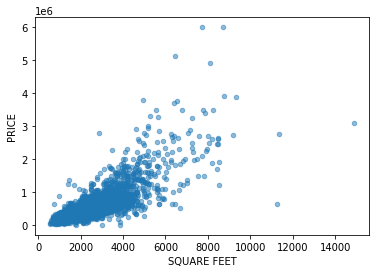

In [616]:
data.plot(kind="scatter", x="SQUARE FEET", y="PRICE", alpha=0.5)

In [617]:
len(data['CITY'].value_counts())

37

In [618]:
def compute_clusters(in_data):
  freq = in_data.groupby('CITY').count()['ADDRESS']
  mean = in_data.groupby('CITY').mean()['$/SQUARE FEET']
  cluster = pd.concat([freq, mean], axis=1)
  cluster['CITY'] = cluster.index
  cluster.columns = ['freq', '$/SQUARE FEET','CITY']
  return cluster

def segment_clusters(in_cluster):
  _cd = in_cluster.describe()
  _cluster1 = in_cluster[in_cluster['$/SQUARE FEET'] < _cd.loc['50%', '$/SQUARE FEET']]
  _cluster_temp = in_cluster[in_cluster['$/SQUARE FEET'] >= _cd.loc['50%', '$/SQUARE FEET']]
  _cluster2 = _cluster_temp[_cluster_temp.freq < _cd.loc['50%', 'freq']]
  _cluster3 = _cluster_temp[_cluster_temp.freq >= _cd.loc['50%', 'freq']]
  return [_cluster1, _cluster2, _cluster3]

In [619]:
freq = data.groupby('CITY').count()['ADDRESS']
mean = data.groupby('CITY').mean()['$/SQUARE FEET']
cluster = pd.concat([freq, mean], axis=1)
cluster['CITY'] = cluster.index
cluster.columns = ['freq', '$/SQUARE FEET','CITY']
cd = cluster.describe()
cd

,freq,$/SQUARE FEET
count,37.000000,37.000000
mean,108.081081,190.618894
std,165.722556,46.298754
min,1.000000,94.680272
25%,2.000000,153.328947
50%,29.000000,182.000000
75%,119.000000,224.832298
max,576.000000,316.646465


In [620]:
# Low priced homes
cluster1 = cluster[cluster['$/SQUARE FEET'] < cd.loc['50%', '$/SQUARE FEET']]
cluster1.index

Index(['AUBURN HILLS', 'Auburn Hills', 'Bloomfield', 'Farmington Hills',
       'Keego Harbor', 'Lathrup Village', 'Martiny Twp', 'Pontiac',
       'ROCHESTER HILLS', 'Rochester Hills', 'Southfield', 'Update',
       'WATERFORD', 'WEST BLOOMFIELD', 'West Bloomfield',
       'West Bloomfield TWP', 'West Bloomfield Township',
       'West Bloomfield Twp'],
      dtype='object', name='CITY')

In [621]:
# High price, Low Frequency
cluster_temp = cluster[cluster['$/SQUARE FEET'] >= cd.loc['50%', '$/SQUARE FEET']]
cluster2 = cluster_temp[cluster_temp.freq < cd.loc['50%', 'freq']]
cluster2.index

Index(['Beverly Hills', 'Beverly Hills vlg', 'Bingham Farms Vlg',
       'Bloomfield twp', 'Franklin', 'Rochester', 'Waterford'],
      dtype='object', name='CITY')

In [622]:
# High price, High Frequency
cluster3 = cluster_temp[cluster_temp.freq >= cd.loc['50%', 'freq']]
cluster3.index

Index(['Berkley', 'Beverly Hills Vlg', 'Birmingham', 'Bloomfield Hills',
       'Bloomfield Twp', 'Clawson', 'Franklin Vlg', 'Orchard Lake Village',
       'Royal Oak', 'Sylvan Lake', 'Troy', 'Waterford Twp'],
      dtype='object', name='CITY')

In [623]:
_data = data.copy(deep=True)

In [624]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'

_data['GROUP'] = _data.CITY.apply(get_group)

In [625]:
_data = _data[['PRICE', 'GROUP', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'BATHS', 'BEDS']]
_data.dropna(inplace=True)
_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PRICE,GROUP,SQUARE FEET,LOT SIZE,YEAR BUILT,BATHS,BEDS
0,335000.0,low_price,1870.0,14810.0,1972.0,2.5,4.0
1,220000.0,low_price,1508.0,55321.0,1952.0,2.0,3.0
2,300000.0,low_price,2158.0,24393.0,1968.0,2.5,4.0
3,284000.0,low_price,1545.0,9147.0,1965.0,2.0,4.0
4,265000.0,low_price,1576.0,7840.0,1961.0,1.5,3.0


In [626]:
X = _data[['GROUP', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'BATHS', 'BEDS']]
Y = _data['PRICE']

n = pd.get_dummies(_data.GROUP)
X = pd.concat([X, n], axis=1)
drops = ['GROUP']
X.drop(drops, inplace=True, axis=1)

In [627]:
X.head()

,SQUARE FEET,LOT SIZE,YEAR BUILT,BATHS,BEDS,high_price_high_freq,high_price_low_freq,low_price
0,1870.0,14810.0,1972.0,2.5,4.0,0,0,1
1,1508.0,55321.0,1952.0,2.0,3.0,0,0,1
2,2158.0,24393.0,1968.0,2.5,4.0,0,0,1
3,1545.0,9147.0,1965.0,2.0,4.0,0,0,1
4,1576.0,7840.0,1961.0,1.5,3.0,0,0,1


In [628]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3881 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SQUARE FEET           3881 non-null   float64
 1   LOT SIZE              3881 non-null   float64
 2   YEAR BUILT            3881 non-null   float64
 3   BATHS                 3881 non-null   float64
 4   BEDS                  3881 non-null   float64
 5   high_price_high_freq  3881 non-null   uint8  
 6   high_price_low_freq   3881 non-null   uint8  
 7   low_price             3881 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 193.3 KB


In [629]:
Y.head()

0    335000.0
1    220000.0
2    300000.0
3    284000.0
4    265000.0
Name: PRICE, dtype: float64

In [630]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [631]:
y_pred = regressor.predict(X_test)
linear_score = regressor.score(X_test, y_test)
print('Linear Regression R squared": %.4f' % linear_score)

Linear Regression R squared": 0.6615


In [632]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 224230.0245


In [633]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 147461.3520


In [634]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [635]:
forest_score = forest_reg.score(X_test, y_test)
print('Random Forest R squared": %.4f' % forest_score)

Random Forest R squared": 0.7246


In [636]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 202264.3240


In [637]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [638]:
gradient_score = model.score(X_test, y_test)
print('Gradient Boosting R squared": %.4f' % gradient_score)

Gradient Boosting R squared": 0.7434


In [639]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 195248.4413


In [640]:
feature_labels = np.array(['SQUARE FEET',	'LOT SIZE',	'YEAR BUILT',	'BATHS',	'BEDS',	'high_price_high_freq',	'high_price_low_freq',	'low_price'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} ==> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

high_price_low_freq ==> 0.00%
BEDS ==> 0.20%
low_price ==> 1.95%
high_price_high_freq ==> 2.72%
LOT SIZE ==> 3.74%
YEAR BUILT ==> 6.83%
BATHS ==> 24.20%
SQUARE FEET ==> 60.36%


In [641]:
def get_predict_frame(sqft, lot_size, yr_built, baths, beds, hphf, hplf, lp):
  dict = {'SQUARE FEET':[sqft],
        'LOT SIZE':[lot_size],
        'YEAR BUILT':[yr_built],
        'BATHS':[baths],
        'BEDS':[beds],
        'high_price_high_freq':[hphf],
        'high_price_low_freq':[hplf],
        'low_price':[lp]
       }
  
  df = pd.DataFrame(dict)
  return df

In [642]:
# Rudgate at 8314 square feet livable space (second listing)
# model.predict(get_predict_frame(8314, 86248, 1994, 5, 7, 1, 0, 0))

In [643]:
# Rudgate at 5814 square feet livable space (first listing)
# model.predict(get_predict_frame(5814, 86248, 1994, 5, 7, 1, 0, 0))

In [644]:
def run_prediction(frame):
  _linear = regressor.predict(frame)
  _forest = forest_reg.predict(frame)
  _gradient = model.predict(frame)

  s = f"Linear: {_linear} (R2: {linear_score}, RMSE: {lin_rmse})\nForest: {_forest} (R2: {forest_score}, RMSE: {forest_rmse})\nGradient: {_gradient} (R2: {gradient_score}, RMSE: {model_rmse})\n"
  print(s)

In [645]:

run_prediction(get_predict_frame(8314, 86248, 1994, 7, 5, 1, 0, 0))
run_prediction(get_predict_frame(5814, 86248, 1994, 7, 5, 1, 0, 0))

# frame = get_predict_frame(7591, 42688, 1935, 8, 6, 1, 0, 0)

# frame = get_predict_frame(8314, 86248, 1994, 5, 7, 1, 0, 0)

# _linear = regressor.predict(frame)
# _forest = forest_reg.predict(frame)
# _gradient = model.predict(frame)

# s = f"Linear: {_linear} (R2: {linear_score}, RMSE: {lin_rmse})\nForest: {_forest} (R2: {forest_score}, RMSE: {forest_rmse})\nGradient: {_gradient} (R2: {gradient_score}, RMSE: {model_rmse})\n"
# print(s)

Linear: [2383640.84719715] (R2: 0.661520007719304, RMSE: 224230.02454419882)
Forest: [2572790.] (R2: 0.7245872459602076, RMSE: 202264.3239730384)
Gradient: [2564468.39797936] (R2: 0.743362199515893, RMSE: 195248.44129165946)

Linear: [1780996.11297637] (R2: 0.661520007719304, RMSE: 224230.02454419882)
Forest: [2080234.] (R2: 0.7245872459602076, RMSE: 202264.3239730384)
Gradient: [1962011.20259465] (R2: 0.743362199515893, RMSE: 195248.44129165946)



In [646]:
# _fs = pd.read_csv('oakland_area_fs.csv')

# _fs['GROUP'] = _fs.CITY.apply(get_group)

# _fs = _fs[['CITY', 'PRICE', 'GROUP', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'BATHS', 'BEDS', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)']]
# _fs.dropna(inplace=True)

# __X = _fs[['CITY', 'GROUP', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'BATHS', 'BEDS', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)']]
# __Y = _fs['PRICE']

# _n = pd.get_dummies(_data.GROUP)
# __X = pd.concat([__X, _n], axis=1)
# _drops = ['GROUP']
# __X.drop(_drops, inplace=True, axis=1)
# __X.dropna(inplace=True)

# count = 0
# tcount = 0

# for index, row in __X.iterrows():
#   test_frame = get_predict_frame(row['SQUARE FEET'], row['LOT SIZE'], row['YEAR BUILT'], row['BATHS'], row['BEDS'], row['high_price_high_freq'], row['high_price_low_freq'], row['low_price'])
#   list_price = __Y[index]
#   predicted_price = model.predict(test_frame)
#   tcount += 1

#   if ((list_price + (list_price * 0.15)) < predicted_price and row['high_price_high_freq'] == 1.0 ):
#     print(f"URL: {row['URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)']}\nList: {list_price} ==> Prediction: {predicted_price}")
#     count += 1

# print(f"Discovered {count} homes with favorable sale prices out of {tcount} total homes.")

